In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Euler's method: y_(n+1) = y_n + hf(x_n, y_n)
# ---- Plot step size 'h' and error on X and Y axes, and check if reducing 'h' reduces the error

class ODE:
    def __init__(self, x0, x_end, y0):
        self.x0 = x0
        self.x_end = x_end
        self.y0 = y0

    def f_ode(self, x_point, y_point):
        # return (x_point + y_point)  # Test euler
        return (y_point + np.cos(x_point))  # Test modified euler

    # Analytical Solution
    def f_actual(self, x_point):
        # return (2 * np.exp(x_point) - x_point - 1)  # Test euler
        return ((3.0 / 2.0) * np.exp(x_point)) + ((1.0 / 2.0) * (np.sin(x_point) - np.cos(x_point)))  # Test modified euler

    # -------------------------------------------------------

    # Euler's Method
    def eulers_method(self, h):
        n = int((self.x_end - self.x0) / h)
        x = np.linspace(self.x0, self.x_end, n + 1)  # Generating equal spaced x values
        y = np.zeros(n + 1)
        y[0] = self.y0

        for i in range(n):
            y[i + 1] = y[i] + h * self.f_ode(x[i], y[i])

        return x, y

    # -------------------------------------------------------

    # Modified Euler Method
    def modified_euler_method(self, h):
        x = np.arange(self.x0, self.x_end + 1e-12, h)
        n = len(x) - 1
        y = np.zeros(n + 1)
        y[0] = self.y0

        for i in range(n):
            y_pred = y[i] + h * self.f_ode(x[i], y[i])  # Predictor
            y[i + 1] = y[i] + (h / 2.0) * (self.f_ode(x[i], y[i]) + self.f_ode(x[i + 1], y_pred)) # Corrector

        # print(x, y)
        return x, y

    # -------------------------------------------------------

    def rk4(self, h):
        
    
    # -------------------------------------------------------

    def compare_error(self, method = "Eulers"):
        h_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
        errors = []

        for h in h_values:
            if method == "Eulers":
                x, y = self.eulers_method(h)
            elif method == "Modified_Eulers":
                x, y = self.modified_euler_method(h)
            actual_error = self.f_actual(self.x_end)  
            err = abs(y[-1] - actual_error)  # Considering the absolute error of the last value
            errors.append(err)

        plt.loglog(h_values, errors, marker = 'o')
        plt.title("Error vs Step Size (Euler's Method)")
        plt.xlabel("Step size (h)")
        plt.ylabel(f"Absolute error at x = {self.x_end}")
        plt.show()

        for h_val, err in zip(h_values, errors):
            print(f"h = {h_val:.5f}, Error = {err:.8f}")

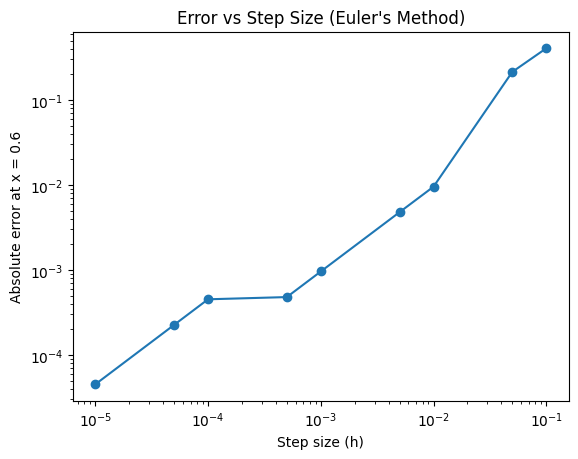

h = 0.10000, Error = 0.40458876
h = 0.05000, Error = 0.21360918
h = 0.01000, Error = 0.00953919
h = 0.00500, Error = 0.00478751
h = 0.00100, Error = 0.00096039
h = 0.00050, Error = 0.00048038
h = 0.00010, Error = 0.00045244
h = 0.00005, Error = 0.00022623
h = 0.00001, Error = 0.00004525


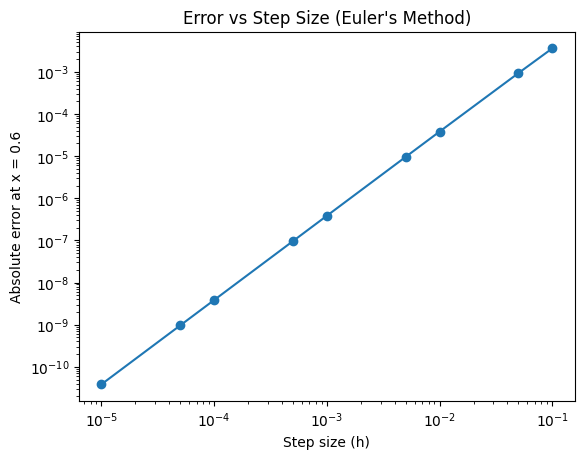

h = 0.10000, Error = 0.00361970
h = 0.05000, Error = 0.00093389
h = 0.01000, Error = 0.00003830
h = 0.00500, Error = 0.00000961
h = 0.00100, Error = 0.00000039
h = 0.00050, Error = 0.00000010
h = 0.00010, Error = 0.00000000
h = 0.00005, Error = 0.00000000
h = 0.00001, Error = 0.00000000


In [63]:
ode_obj = ODE(0.0, 0.6, 1)
ode_obj.compare_error("Eulers")

ode_obj.modified_euler_method(0.2)
ode_obj.compare_error("Modified_Eulers")